# Banking and Unemployment
---
The below script explores the relationship between states with high unemployment rates and bank counts per state.

In this script, we retrieved and plotted data from the 2013 US Census and Google Places API to show the relationship between various socioeconomic parameters and bank count across 700 randomly selected zip codes. We used Pandas, Numpy, Matplotlib, Requests, Census API, and Google API to accomplish our task.

In [23]:
# Dependencies
from census import Census
from config import (census_key, gkey)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from us import states
import matplotlib.pyplot as plt


# Census API Key
c = Census(census_key, year=2013)

## Data Retrieval

In [20]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("B01003_001E", "B23025_005E"), {
                         'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B23025_005E": "Unemployment Count",
                                      "zip code tabulation area": "Zipcode"})
census_pd.head()

,Population,Unemployment Count,Zipcode
0,22121.0,1258.0,01832
1,8295.0,320.0,01833
2,6675.0,233.0,01834
3,13527.0,452.0,01835
4,4547.0,255.0,01840


In [21]:
# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)
census_pd.head()

,Population,Unemployment Count,Zipcode,Unemployment Rate
0,22121.0,1258.0,01832,5.686904
1,8295.0,320.0,01833,3.857746
2,6675.0,233.0,01834,3.490637
3,13527.0,452.0,01835,3.341465
4,4547.0,255.0,01840,5.608093


In [2]:
# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Unemployment Rate"]]

# Visualize
print(len(census_pd))
census_pd.head()

33120


,Zipcode,Population,Unemployment Rate
0,00601,18450.0,7.934959
1,00602,41302.0,11.541814
2,00603,53683.0,8.086359
3,00606,6591.0,2.033075
4,00610,28963.0,3.915340


In [18]:
census_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 3 columns):
Zipcode              33120 non-null object
Population           33120 non-null float64
Unemployment Rate    32784 non-null float64
dtypes: float64(2), object(1)
memory usage: 776.3+ KB


In [22]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_income = c.acs5.get(("B01003_001E", "B19301_001E", "B01002_002E","B01002_003E"), {
                         'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd1 = pd.DataFrame(census_income)

# Column Reordering
census_pd1 = census_pd1.rename(columns={"B01003_001E": "Population",
                                      "B19301_001E": "Income per Capita",
                                        "B01002_002E": "Male Median Age",
                                        "B01002_003E": "Female Median Age",
                                      "zip code tabulation area": "Zipcode"})

# Add in Employment Rate (Employment Count / Population)
# census_pd1["Unemployment Rate"] = 100 * \
#     census_pd["Unemployment Count"].astype(
#         int) / census_pd["Population"].astype(int)

# Final DataFrame
# census_pd = census_pd[["Zipcode", "Population", "Unemployment Rate"]]

# Visualize
print(len(census_pd1))
census_pd1.head()

33120


,Male Median Age,Female Median Age,Population,Income per Capita,Zipcode
0,35.4,38.4,18450.0,7380.0,00601
1,38.1,39.2,41302.0,8463.0,00602
2,37.4,40.4,53683.0,9176.0,00603
3,37.1,37.8,6591.0,6383.0,00606
4,36.6,40.9,28963.0,7892.0,00610


In [39]:
census_high_income = census_pd1[census_pd1['Income per Capita']>=70000]
census_high_income

,Male Median Age,Female Median Age,Population,Income per Capita,Zipcode
355,49.2,47.0,4918.0,77585.0,01741
367,44.0,46.8,4169.0,73420.0,01770
369,48.2,49.1,4836.0,75535.0,01773
371,42.6,43.2,17922.0,72744.0,01776
422,46.4,48.8,5185.0,70075.0,01944
440,41.1,46.8,5677.0,89476.0,02030
462,35.5,33.0,4062.0,83723.0,02108
463,33.9,33.9,4241.0,90256.0,02109
464,40.7,59.4,1752.0,136352.0,02110
469,33.7,32.6,21793.0,80314.0,02116


(0, 100)

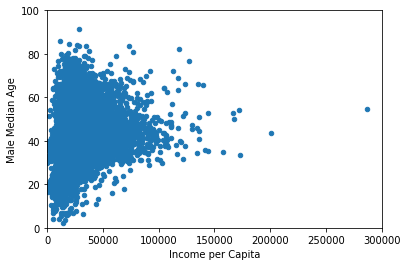

In [36]:
#plt.scatter(census_pd1['Income per Capita'], census_pd1['Male Median Age'])
census_pd1.plot.scatter('Income per Capita','Male Median Age')
plt.xlim(0, 300000)
plt.ylim(0,100)

(0, 100)

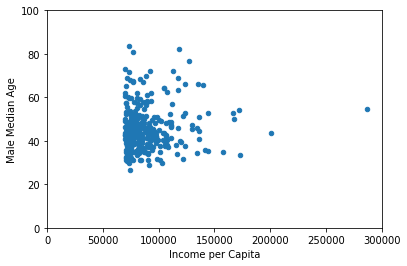

In [40]:
#plt.scatter(census_pd1['Income per Capita'], census_pd1['Male Median Age'])
census_high_income.plot.scatter('Income per Capita','Male Median Age')
plt.xlim(0, 300000)
plt.ylim(0,100)

(0, 100)

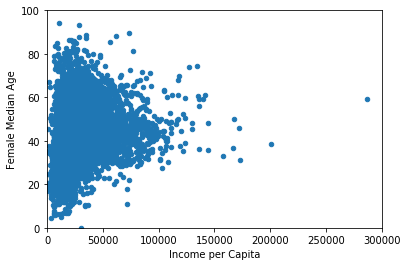

In [37]:
#plt.scatter(census_pd1['Income per Capita'], census_pd1['Male Median Age'])
census_pd1.plot.scatter('Income per Capita','Female Median Age')
plt.xlim(0, 300000)
plt.ylim(0,100)

(0, 100)

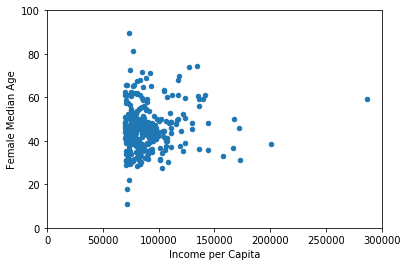

In [41]:
#plt.scatter(census_pd1['Income per Capita'], census_pd1['Male Median Age'])
census_high_income.plot.scatter('Income per Capita','Female Median Age')
plt.xlim(0, 300000)
plt.ylim(0,100)

In [15]:
census_data

[{'B01003_001E': 18450.0,
  'B23025_005E': 1464.0,
  'zip code tabulation area': '00601'},
 {'B01003_001E': 41302.0,
  'B23025_005E': 4767.0,
  'zip code tabulation area': '00602'},
 {'B01003_001E': 53683.0,
  'B23025_005E': 4341.0,
  'zip code tabulation area': '00603'},
 {'B01003_001E': 6591.0,
  'B23025_005E': 134.0,
  'zip code tabulation area': '00606'},
 {'B01003_001E': 28963.0,
  'B23025_005E': 1134.0,
  'zip code tabulation area': '00610'},
 {'B01003_001E': 68055.0,
  'B23025_005E': 3805.0,
  'zip code tabulation area': '00612'},
 {'B01003_001E': 10183.0,
  'B23025_005E': 324.0,
  'zip code tabulation area': '00616'},
 {'B01003_001E': 24879.0,
  'B23025_005E': 1394.0,
  'zip code tabulation area': '00617'},
 {'B01003_001E': 6165.0,
  'B23025_005E': 135.0,
  'zip code tabulation area': '00622'},
 {'B01003_001E': 44704.0,
  'B23025_005E': 1617.0,
  'zip code tabulation area': '00623'},
 {'B01003_001E': 25340.0,
  'B23025_005E': 2358.0,
  'zip code tabulation area': '00624'},
 {'B

In [5]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [6]:
# Store 'Lat' and 'Lng' into  locations 
locations = census_data_complete[["Lat", "Lng"]].astype(float)

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
poverty_rate = census_data_complete["Poverty Rate"].astype(float)

In [13]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=poverty_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

## Combine Data

In [3]:
# Import the original data we analyzed earlier. Use dtype="object" to match other
census_data_original = pd.read_csv(
    "../Resources/zip_bank_data.csv", dtype="object", encoding="utf-8")

# Visualize
census_data_original.head()

,Zipcode,Address,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Lat,Lng,Bank Count
0,49058,"Hastings, MI 49058, USA",19031,40.8,46777,22137,13.18375282,42.6306916,-85.2929384,9
1,71405,"Ball, LA 71405, USA",5687,35.8,55242,23941,15.73764727,31.4061799,-92.396174,12
2,20634,"Great Mills, MD 20634, USA",6562,31.9,79944,35961,9.295946358,38.2201614,-76.4967919,9
3,38487,"Williamsport, TN 38487, USA",762,41.6,38125,18884,24.40944882,35.7310368,-87.2419299,0
4,58466,"Marion, ND 58466, USA",509,44.5,69844,36981,9.430255403,46.5594224,-98.3481542,1


In [4]:
# Merge the two data sets along zip code
census_data_complete = pd.merge(
    census_data_original, census_pd, how="left", on=["Zipcode", "Zipcode"])

# Save the revised Data Frame as a csv
census_data_complete.to_csv(
    "../Resources/bank_data_with_employment.csv", encoding="utf-8", index=False)

# Visualize
census_data_complete.head()

,Zipcode,Address,Population_x,Median Age,Household Income,Per Capita Income,Poverty Rate,Lat,Lng,Bank Count,Population_y,Unemployment Rate
0,49058,"Hastings, MI 49058, USA",19031,40.8,46777,22137,13.18375282,42.6306916,-85.2929384,9,19031.0,5.312385
1,71405,"Ball, LA 71405, USA",5687,35.8,55242,23941,15.73764727,31.4061799,-92.396174,12,5687.0,4.571830
2,20634,"Great Mills, MD 20634, USA",6562,31.9,79944,35961,9.295946358,38.2201614,-76.4967919,9,6562.0,4.053642
3,38487,"Williamsport, TN 38487, USA",762,41.6,38125,18884,24.40944882,35.7310368,-87.2419299,0,762.0,10.236220
4,58466,"Marion, ND 58466, USA",509,44.5,69844,36981,9.430255403,46.5594224,-98.3481542,1,509.0,1.178782


## Heatmap of poverty rate

In [5]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [6]:
# Store 'Lat' and 'Lng' into  locations 
locations = census_data_complete[["Lat", "Lng"]].astype(float)

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
poverty_rate = census_data_complete["Poverty Rate"].astype(float)

In [13]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=poverty_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

![Heatmap](../Images/heatmap.png)

In [ ]:
# Convert bank rate to list
bank_rate = census_data_complete["Bank Count"].tolist()

In [ ]:
# Create bank symbol layer
bank_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
    info_box_content=[f"Bank amount: {bank}" for bank in bank_rate]
)


fig = gmaps.figure()
fig.add_layer(bank_layer)

fig

![Bank Map](../Images/bank_map.png)

In [ ]:
# Create a combined map
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(bank_layer)

fig

![Combined Map](../Images/final_map.png)